In [4]:
# ================================================================================
# NOTEBOOK 02: ANÁLISE DE OUTLIERS E VALIDAÇÃO DE DADOS
# ================================================================================
# Projeto: Mediação Bancária - Agibank
# Objetivo: Detectar outliers, validar dados e preparar visualizações com NumPy
# Data: 24/02/2025
# ================================================================================

"""
ROADMAP DESTE NOTEBOOK:

1. ✅ Configuração e importações
2. ✅ Carregamento de bases normalizadas (pickles)
3. ✅ Validação detalhada - Campinas (78 reclamações)
4. ✅ Detecção de outliers - Tempo (IQR + Z-Score com NumPy)
5. ✅ Detecção de outliers - Notas (Distribuições anômalas)
6. ✅ Classificações com NumPy (Risco churn, Score satisfação)
7. ✅ Análise de padrões demográficos e temporais
8. ✅ Exportação de dados limpos com flags

OBJETIVO PRINCIPAL:
   - Validar as 78 reclamações do Agibank em Campinas
   - Detectar e tratar outliers usando NumPy (vetorização)
   - Preparar dados limpos para os 10 gráficos estratégicos
"""

print("=" * 80)
print("NOTEBOOK 02: ANÁLISE DE OUTLIERS E VALIDAÇÃO")
print("=" * 80)
print("\n✅ Notebook inicializado!")

NOTEBOOK 02: ANÁLISE DE OUTLIERS E VALIDAÇÃO

✅ Notebook inicializado!


In [7]:
# CONFIGURAÇÃO DO AMBIENTE E IMPORTAÇÕES

import sys
from pathlib import Path

# Obter diretório atual
caminho_atual = Path.cwd()

# Subir 2 níveis para chegar na raiz do projeto
raiz_projeto = caminho_atual.parent.parent

# Adicionar raiz do projeto ao path
sys.path.insert(0, str(raiz_projeto))

print(f"Diretório atual: {caminho_atual}")
print(f"Raiz do projeto: {raiz_projeto}")
print(f"Caminho adicionado ao sys.path")

# Verificar se a pasta lib existe
caminho_lib = raiz_projeto / 'lib'
print(f"\nPasta 'lib' encontrada em: {caminho_lib}")

Diretório atual: c:\Users\caroline.coutinho\projeto_mediacao_bancaria\analises\gold
Raiz do projeto: c:\Users\caroline.coutinho\projeto_mediacao_bancaria
Caminho adicionado ao sys.path

Pasta 'lib' encontrada em: c:\Users\caroline.coutinho\projeto_mediacao_bancaria\lib


In [8]:
# IMPORTAR BIBLIOTECAS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px        
import plotly.graph_objects as go  
import altair as alt               
from datetime import datetime

print("✅ Bibliotecas básicas importadas!")

✅ Bibliotecas básicas importadas!


In [9]:
from lib.carregamento import (
    carregar_base_silver,
    carregar_base_gold_sp,
    carregar_base_agibank,
    carregar_base_setorial,
    carregar_base_filtrada,
    listar_arquivos_disponiveis,
    info_base
)

from lib.cores import (
    aplicar_tema_agibank,
    configurar_plotly,
    CORES_AGIBANK,
    PALETA_CATEGORICA,
    PALETA_AZUL,
    PALETA_VERDE,
    PLOTLY_COLORS,
    PLOTLY_PALETTE,
    PLOTLY_SCALE_AZUL,
    PLOTLY_SCALE_VERDE
)

from lib.visualizacoes import (
    grafico_barras,
    grafico_linha,
    grafico_pizza,
    grafico_boxplot,
    grafico_heatmap,
    grafico_distribuicao,
    grafico_comparativo_barras
)

print("✅ Módulos customizados importados!")

Tema Agibank aplicado - Tamanho: medio
✅ Módulos customizados importados!


In [10]:
warnings.filterwarnings('ignore')
np.random.seed(42)

np.set_printoptions(
    precision=2,
    suppress=True,
    linewidth=120,
    edgeitems=5,
    threshold=1000
)

print("✅ Configurações NumPy aplicadas!")

✅ Configurações NumPy aplicadas!


In [11]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)
pd.set_option('mode.use_inf_as_na', True)

print("✅ Configurações Pandas aplicadas!")

✅ Configurações Pandas aplicadas!


In [12]:
aplicar_tema_agibank('grande')

try:
    get_ipython().run_line_magic('matplotlib', 'inline')
except:
    pass

plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

print("✅ Tema Agibank aplicado para Matplotlib e Seaborn!")

Tema Agibank aplicado - Tamanho: grande
✅ Tema Agibank aplicado para Matplotlib e Seaborn!


In [13]:
configurar_plotly()

print("✅ Configurações Plotly aplicadas!")

Tema Agibank aplicado ao Plotly
✅ Configurações Plotly aplicadas!


In [14]:
alt.renderers.enable('default')
alt.data_transformers.disable_max_rows()

print("✅ Configurações Altair aplicadas!")

✅ Configurações Altair aplicadas!


In [15]:
ANO_ANALISE = np.int16(2025)
JANELA_ANOS = np.array([ANO_ANALISE - 1, ANO_ANALISE], dtype=np.int16)
DATAS_REFERENCIA = np.arange(f'{ANO_ANALISE}-01', f'{ANO_ANALISE+1}-01', dtype='datetime64[M]')

RAIZ_PROJETO = Path.cwd()
CAMINHO_OUTPUT = RAIZ_PROJETO / 'output'
CAMINHO_OUTPUT.mkdir(exist_ok=True)

CAMINHO_PICKLES = CAMINHO_OUTPUT / 'pickles'
CAMINHO_CENSO = Path(r"C:\Users\caroline.coutinho\projeto_mediacao_bancaria\data\gold\limpo\brasil")

print("✅ Constantes definidas!")
print(f"   Ano de análise: {ANO_ANALISE}")
print(f"   Pasta de output: {CAMINHO_OUTPUT}")
print(f"   Pasta de pickles: {CAMINHO_PICKLES}")
print(f"   Pasta dados Censo: {CAMINHO_CENSO}")

✅ Constantes definidas!
   Ano de análise: 2025
   Pasta de output: c:\Users\caroline.coutinho\projeto_mediacao_bancaria\analises\gold\output
   Pasta de pickles: c:\Users\caroline.coutinho\projeto_mediacao_bancaria\analises\gold\output\pickles
   Pasta dados Censo: C:\Users\caroline.coutinho\projeto_mediacao_bancaria\data\gold\limpo\brasil


In [16]:
print("=" * 80)
print("AMBIENTE CONFIGURADO COM SUCESSO")
print("=" * 80)

try:
    import plotly
    plotly_v = plotly.__version__
except:
    plotly_v = "Instalado"

info_libs = np.array([
    ['Pandas', pd.__version__],
    ['NumPy', np.__version__],
    ['Matplotlib', plt.matplotlib.__version__],
    ['Seaborn', sns.__version__],
    ['Plotly', plotly_v],
    ['Altair', alt.__version__],
    ['Python', sys.version.split()[0]]
])

print(f"\nVersoes das bibliotecas:")
for lib, versao in info_libs:
    print(f"   {lib}: {versao}")

print(f"\nConfiguracoes do projeto:")
print(f"   Ano de analise: {ANO_ANALISE}")
print(f"   Pasta de output: {CAMINHO_OUTPUT}")
print(f"   Path atual: {RAIZ_PROJETO}")

paleta_mpl_np = np.array(PALETA_CATEGORICA)
paleta_plotly_np = np.array(PLOTLY_PALETTE)

print(f"\nTema visual:")
print(f"   Tema Agibank aplicado (tamanho: grande)")
print(f"   Paleta Matplotlib: {paleta_mpl_np.size} cores")
print(f"   Paleta Plotly: {paleta_plotly_np.size} cores")

print("=" * 80)

AMBIENTE CONFIGURADO COM SUCESSO

Versoes das bibliotecas:
   Pandas: 2.3.3
   NumPy: 2.3.5
   Matplotlib: 3.10.7
   Seaborn: 0.13.2
   Plotly: 6.5.1
   Altair: 6.0.0
   Python: 3.13.5

Configuracoes do projeto:
   Ano de analise: 2025
   Pasta de output: c:\Users\caroline.coutinho\projeto_mediacao_bancaria\analises\gold\output
   Path atual: c:\Users\caroline.coutinho\projeto_mediacao_bancaria\analises\gold

Tema visual:
   Tema Agibank aplicado (tamanho: grande)
   Paleta Matplotlib: 6 cores
   Paleta Plotly: 6 cores


In [17]:
print("\n" + "=" * 80)
print("CARREGANDO BASES NORMALIZADAS")
print("=" * 80)

print("\nCarregando pickles...")

df_agibank_normalizado = pd.read_pickle(CAMINHO_PICKLES / 'df_agibank_normalizado.pkl')
print(f"   df_agibank_normalizado: {len(df_agibank_normalizado):,} registros")

df_sp_normalizado = pd.read_pickle(CAMINHO_PICKLES / 'df_sp_normalizado.pkl')
print(f"   df_sp_normalizado: {len(df_sp_normalizado):,} registros")

df_financeiro_sp = pd.read_pickle(CAMINHO_PICKLES / 'df_financeiro_sp.pkl')
print(f"   df_financeiro_sp: {len(df_financeiro_sp):,} registros")

df_brasil_normalizado = pd.read_pickle(CAMINHO_PICKLES / 'df_brasil_normalizado.pkl')
print(f"   df_brasil_normalizado: {len(df_brasil_normalizado):,} registros")

print("\nTodas as bases normalizadas carregadas!")


CARREGANDO BASES NORMALIZADAS

Carregando pickles...
   df_agibank_normalizado: 4,006 registros
   df_sp_normalizado: 649,557 registros
   df_financeiro_sp: 394,166 registros
   df_brasil_normalizado: 2,567,095 registros

Todas as bases normalizadas carregadas!


In [19]:
print("\n" + "=" * 80)
print("RESUMO DAS BASES CARREGADAS")
print("=" * 80)

bases_info = {
    'BASES NORMALIZADAS (com populacao)': {
        'df_agibank_normalizado': len(df_agibank_normalizado),
        'df_sp_normalizado': len(df_sp_normalizado),
        'df_financeiro_sp': len(df_financeiro_sp),
        'df_brasil_normalizado': len(df_brasil_normalizado)
    },
    'BASES AGREGADAS (resumos)': {
        'df_municipios_sp': len(df_municipios_sp),
        'df_municipios_agibank': len(df_municipios_agibank),
        'df_instituicoes_financeiro': len(df_instituicoes_financeiro),
        'df_estados_agregado': len(df_estados_agregado)
    }
}

for categoria, bases in bases_info.items():
    print(f"\n{categoria}:")
    print("-" * 80)
    for nome, tamanho in bases.items():
        print(f"   {nome:35s} {tamanho:>10,} registros")

print("\n" + "=" * 80)
print("TODAS AS BASES PRONTAS PARA ANALISE!")
print("=" * 80)


RESUMO DAS BASES CARREGADAS

BASES NORMALIZADAS (com populacao):
--------------------------------------------------------------------------------
   df_agibank_normalizado                   4,006 registros
   df_sp_normalizado                      649,557 registros
   df_financeiro_sp                       394,166 registros
   df_brasil_normalizado                2,567,095 registros

BASES AGREGADAS (resumos):
--------------------------------------------------------------------------------
   df_municipios_sp                           636 registros
   df_municipios_agibank                      361 registros
   df_instituicoes_financeiro                 533 registros
   df_estados_agregado                         27 registros

TODAS AS BASES PRONTAS PARA ANALISE!


In [20]:
print("\n" + "=" * 80)
print("VALIDACAO DETALHADA: CAMPINAS")
print("=" * 80)

# Filtrar Campinas
campinas_agi = df_agibank_normalizado[
    df_agibank_normalizado['cidade'].str.upper() == 'CAMPINAS'
].copy()

campinas_setor = df_financeiro_sp[
    df_financeiro_sp['cidade'].str.upper() == 'CAMPINAS'
].copy()

POPULACAO_CAMPINAS = 1139047

print(f"\nRESUMO CAMPINAS:")
print(f"   Populacao: {POPULACAO_CAMPINAS:,} habitantes")
print(f"   Reclamacoes Agibank: {len(campinas_agi)}")
print(f"   Reclamacoes Setor Financeiro: {len(campinas_setor):,}")

# Métricas Agibank
taxa_agi = (len(campinas_agi) / POPULACAO_CAMPINAS) * 100000
nota_agi = campinas_agi['nota_do_consumidor'].mean()
tempo_agi = campinas_agi['tempo_resposta'].mean()
resolvido_agi = (campinas_agi['avaliacao_reclamacao'] == 'Resolvida').mean() * 100

print(f"\nAGIBANK EM CAMPINAS:")
print(f"   Taxa/100k habitantes: {taxa_agi:.2f}")
print(f"   Nota media: {nota_agi:.2f}")
print(f"   Tempo medio: {tempo_agi:.2f} dias")
print(f"   % Resolvidas: {resolvido_agi:.1f}%")

# Métricas Setor
taxa_setor = (len(campinas_setor) / POPULACAO_CAMPINAS) * 100000
nota_setor = campinas_setor['nota_do_consumidor'].mean()
tempo_setor = campinas_setor['tempo_resposta'].mean()

print(f"\nSETOR FINANCEIRO EM CAMPINAS:")
print(f"   Taxa/100k habitantes: {taxa_setor:.2f}")
print(f"   Nota media: {nota_setor:.2f}")
print(f"   Tempo medio: {tempo_setor:.2f} dias")

# Comparação
diferenca_taxa = ((taxa_agi - taxa_setor) / taxa_setor) * 100

print(f"\nCOMPARACAO:")
print(f"   Agibank tem {abs(diferenca_taxa):.1f}% {'MENOS' if diferenca_taxa < 0 else 'MAIS'} reclamacoes que o setor")

if diferenca_taxa < 0:
    print(f"   POSITIVO: Agibank esta ABAIXO da media do setor em Campinas!")
else:
    print(f"   ATENCAO: Agibank esta ACIMA da media do setor em Campinas!")


VALIDACAO DETALHADA: CAMPINAS

RESUMO CAMPINAS:
   Populacao: 1,139,047 habitantes
   Reclamacoes Agibank: 78
   Reclamacoes Setor Financeiro: 10,872

AGIBANK EM CAMPINAS:
   Taxa/100k habitantes: 6.85
   Nota media: 1.92
   Tempo medio: 6.59 dias
   % Resolvidas: 5.1%

SETOR FINANCEIRO EM CAMPINAS:
   Taxa/100k habitantes: 954.48
   Nota media: 2.22
   Tempo medio: 5.98 dias

COMPARACAO:
   Agibank tem 99.3% MENOS reclamacoes que o setor
   POSITIVO: Agibank esta ABAIXO da media do setor em Campinas!


In [21]:
print("\n" + "=" * 80)
print("VERIFICACAO NA BASE SILVER - CAMPINAS AGIBANK")
print("=" * 80)

# Carregar base Silver
print("\nCarregando base Silver...")
df_silver = carregar_base_silver()

print(f"Total de registros na Silver: {len(df_silver):,}")

# Verificar se existe coluna is_agibank
if 'is_agibank' in df_silver.columns:
    print("\nColuna 'is_agibank' encontrada!")
    
    # Filtrar Agibank
    df_agibank_silver = df_silver[df_silver['is_agibank'] == True].copy()
    print(f"Total Agibank no Brasil (Silver): {len(df_agibank_silver):,}")
    
    # Filtrar SP
    df_agibank_sp_silver = df_agibank_silver[df_agibank_silver['uf'] == 'SP'].copy()
    print(f"Total Agibank em SP (Silver): {len(df_agibank_sp_silver):,}")
    
    # Filtrar Campinas
    df_agibank_campinas_silver = df_agibank_sp_silver[
        df_agibank_sp_silver['cidade'].str.upper() == 'CAMPINAS'
    ].copy()
    
    print(f"\nTotal Agibank em CAMPINAS (Silver): {len(df_agibank_campinas_silver)}")
    
    # Comparar com a base normalizada
    print(f"\n" + "-" * 80)
    print("COMPARACAO:")
    print(f"   Silver (fonte original): {len(df_agibank_campinas_silver)} registros")
    print(f"   Normalizado (pickle):    {len(campinas_agi)} registros")
    print(f"   Diferenca:               {len(df_agibank_campinas_silver) - len(campinas_agi)}")
    
    if len(df_agibank_campinas_silver) == len(campinas_agi):
        print("\n   CONFIRMADO: Dados consistentes!")
    else:
        print("\n   ATENCAO: Divergencia encontrada!")
        
else:
    print("\nERRO: Coluna 'is_agibank' nao encontrada na Silver!")
    print("Colunas disponiveis:")
    print(df_silver.columns.tolist())


VERIFICACAO NA BASE SILVER - CAMPINAS AGIBANK

Carregando base Silver...
Carregando de: c:\Users\caroline.coutinho\projeto_mediacao_bancaria\data\silver\consumidor_gov_silver_v1.csv
Base carregada com sucesso!
Registros: 2,567,095
Colunas: 30
Total de registros na Silver: 2,567,095

Coluna 'is_agibank' encontrada!
Total Agibank no Brasil (Silver): 19,850
Total Agibank em SP (Silver): 4,006

Total Agibank em CAMPINAS (Silver): 78

--------------------------------------------------------------------------------
COMPARACAO:
   Silver (fonte original): 78 registros
   Normalizado (pickle):    78 registros
   Diferenca:               0

   CONFIRMADO: Dados consistentes!


In [22]:
print("\n" + "=" * 80)
print("ANALISE TEMPORAL - CAMPINAS (AGIBANK)")
print("=" * 80)

# Converter data para datetime
campinas_agi['data_abertura'] = pd.to_datetime(campinas_agi['data_abertura'])

# Extrair ano-mes como array
datas = campinas_agi['data_abertura'].values.astype('datetime64[M]')

# Contar reclamações por mês
meses_unicos, contagens = np.unique(datas, return_counts=True)

print(f"\nDistribuicao mensal:")
for mes, qtd in zip(meses_unicos, contagens):
    print(f"   {mes}: {qtd}")

# Estatísticas
print(f"\nEstatisticas:")
print(f"   Media mensal: {np.mean(contagens):.1f} reclamacoes")
print(f"   Mediana: {np.median(contagens):.1f}")
print(f"   Desvio padrao: {np.std(contagens):.2f}")
print(f"   Maximo: {np.max(contagens)} (mes: {meses_unicos[np.argmax(contagens)]})")
print(f"   Minimo: {np.min(contagens)} (mes: {meses_unicos[np.argmin(contagens)]})")
print(f"   Total de meses: {len(meses_unicos)}")

# Calcular tendência usando regressão linear
if len(contagens) > 1:
    x = np.arange(len(contagens))
    coef = np.polyfit(x, contagens, 1)
    tendencia = coef[0]
    
    print(f"\n   Tendencia linear: {tendencia:+.2f} reclamacoes/mes")
    if tendencia > 0:
        print(f"   Interpretacao: Crescimento ao longo do tempo")
    elif tendencia < 0:
        print(f"   Interpretacao: Reducao ao longo do tempo")
    else:
        print(f"   Interpretacao: Estavel")


ANALISE TEMPORAL - CAMPINAS (AGIBANK)

Distribuicao mensal:
   2025-01: 2
   2025-02: 8
   2025-03: 4
   2025-04: 6
   2025-05: 8
   2025-06: 6
   2025-07: 4
   2025-08: 9
   2025-09: 10
   2025-10: 14
   2025-11: 6
   2025-12: 1

Estatisticas:
   Media mensal: 6.5 reclamacoes
   Mediana: 6.0
   Desvio padrao: 3.45
   Maximo: 14 (mes: 2025-10)
   Minimo: 1 (mes: 2025-12)
   Total de meses: 12

   Tendencia linear: +0.22 reclamacoes/mes
   Interpretacao: Crescimento ao longo do tempo


In [23]:
print("\n" + "=" * 80)
print("ANALISE DEMOGRAFICA - CAMPINAS (AGIBANK)")
print("=" * 80)

# Distribuição por Sexo usando arrays
sexo_valores = campinas_agi['sexo'].values
sexo_unicos, sexo_contagens = np.unique(sexo_valores[~pd.isna(sexo_valores)], return_counts=True)

print(f"\nDistribuicao por Sexo:")
for sexo, qtd in zip(sexo_unicos, sexo_contagens):
    pct = (qtd / len(campinas_agi)) * 100
    print(f"   {sexo}: {qtd} ({pct:.1f}%)")

# Distribuição por Faixa Etária
faixa_valores = campinas_agi['faixa_etaria'].values
faixa_unicos, faixa_contagens = np.unique(faixa_valores[~pd.isna(faixa_valores)], return_counts=True)

# Ordenar por contagem decrescente
idx_ordenado = np.argsort(faixa_contagens)[::-1]
faixa_unicos_ord = faixa_unicos[idx_ordenado]
faixa_contagens_ord = faixa_contagens[idx_ordenado]

print(f"\nDistribuicao por Faixa Etaria:")
for faixa, qtd in zip(faixa_unicos_ord, faixa_contagens_ord):
    pct = (qtd / len(campinas_agi)) * 100
    print(f"   {faixa}: {qtd} ({pct:.1f}%)")

# Identificar faixa etária predominante
faixa_predominante = faixa_unicos_ord[0]
pct_predominante = (faixa_contagens_ord[0] / len(campinas_agi)) * 100

print(f"\nInsights:")
print(f"   Faixa etaria predominante: {faixa_predominante} ({pct_predominante:.1f}%)")

# Verificar concentração em idosos (61+ anos)
idosos_mask = np.isin(faixa_valores, ['entre 61 a 70 anos', 'mais de 70 anos'])
pct_idosos = np.sum(idosos_mask) / len(campinas_agi) * 100

print(f"   Reclamacoes de idosos (61+): {pct_idosos:.1f}%")

if pct_idosos > 40:
    print(f"   ATENCAO: Alta concentracao de reclamacoes de idosos!")
elif pct_idosos > 30:
    print(f"   Concentracao moderada de idosos")
else:
    print(f"   Distribuicao normal")


ANALISE DEMOGRAFICA - CAMPINAS (AGIBANK)

Distribuicao por Sexo:
   F: 35 (44.9%)
   M: 43 (55.1%)

Distribuicao por Faixa Etaria:
   entre 61 a 70 anos: 22 (28.2%)
   entre 51 a 60 anos: 15 (19.2%)
   mais de 70 anos: 13 (16.7%)
   entre 41 a 50 anos: 13 (16.7%)
   entre 21 a 30 anos: 11 (14.1%)
   entre 31 a 40 anos: 4 (5.1%)

Insights:
   Faixa etaria predominante: entre 61 a 70 anos (28.2%)
   Reclamacoes de idosos (61+): 44.9%
   ATENCAO: Alta concentracao de reclamacoes de idosos!


In [24]:
print("\n" + "=" * 80)
print("TOP PROBLEMAS - CAMPINAS (AGIBANK)")
print("=" * 80)

# Extrair problemas como array
problemas_valores = campinas_agi['problema'].values
problemas_valores_limpo = problemas_valores[~pd.isna(problemas_valores)]

# Contar usando arrays
problemas_unicos, problemas_contagens = np.unique(problemas_valores_limpo, return_counts=True)

# Ordenar por contagem decrescente
idx_ordenado = np.argsort(problemas_contagens)[::-1]
problemas_unicos_ord = problemas_unicos[idx_ordenado]
problemas_contagens_ord = problemas_contagens[idx_ordenado]

# Top 10
top_n = min(10, len(problemas_unicos_ord))

print(f"\nTop {top_n} Problemas:")
for i in range(top_n):
    problema = problemas_unicos_ord[i]
    qtd = problemas_contagens_ord[i]
    pct = (qtd / len(campinas_agi)) * 100
    print(f"   {i+1}. {problema[:60]}... ({qtd} - {pct:.1f}%)")

# Calcular concentração do top 3
top3_total = np.sum(problemas_contagens_ord[:3])
pct_top3 = (top3_total / len(campinas_agi)) * 100

print(f"\nInsights:")
print(f"   Top 3 problemas representam: {pct_top3:.1f}% das reclamacoes")
print(f"   Problema mais frequente: {problemas_unicos_ord[0][:50]}...")
print(f"   Frequencia: {problemas_contagens_ord[0]} casos ({(problemas_contagens_ord[0]/len(campinas_agi)*100):.1f}%)")

# Diversidade de problemas
print(f"   Total de problemas unicos: {len(problemas_unicos)}")
print(f"   Concentracao: {'Alta' if pct_top3 > 50 else 'Moderada' if pct_top3 > 30 else 'Baixa'}")


TOP PROBLEMAS - CAMPINAS (AGIBANK)

Top 10 Problemas:
   1. Não entrega do contrato ou documentação relacionada ao servi... (8 - 10.3%)
   2. Cálculo de juros, saldo devedor (contestação, solicitação de... (8 - 10.3%)
   3. Cobrança indevida / abusiva para alterar ou cancelar o contr... (7 - 9.0%)
   4. Cobrança por serviço/produto não contratado / não reconhecid... (7 - 9.0%)
   5. Cláusulas irregulares / abusivas / de interpretação dúbia... (5 - 6.4%)
   6. SAC - Dificuldade para cancelar o serviço... (4 - 5.1%)
   7. Dificuldade de contato / acesso a outros canais (exceto SAC)... (4 - 5.1%)
   8. Cobrança de tarifas, taxas, valores não previstos / não info... (4 - 5.1%)
   9. SAC - Demanda não resolvida / não respondida / respondida ap... (4 - 5.1%)
   10. Dificuldade / atraso na devolução de valores pagos / reembol... (3 - 3.8%)

Insights:
   Top 3 problemas representam: 29.5% das reclamacoes
   Problema mais frequente: Não entrega do contrato ou documentação relacionad...
   Freq

In [25]:
print("\n" + "=" * 80)
print("DEFININDO FUNCAO: DETECCAO DE OUTLIERS - METODO IQR")
print("=" * 80)

def detectar_outliers_iqr(df, coluna='tempo_resposta', multiplicador=1.5):
    """
    Detecta outliers usando método IQR (Interquartile Range)
    
    Parametros:
    -----------
    df : DataFrame
        DataFrame com os dados
    coluna : str
        Nome da coluna para detectar outliers
    multiplicador : float
        Multiplicador do IQR (padrao: 1.5)
        
    Retorna:
    --------
    outliers_mask : array booleano
        True para outliers, False para valores normais
    limite_inf : float
        Limite inferior
    limite_sup : float
        Limite superior
    q1, q3 : float
        Quartis 1 e 3
    """
    
    # Extrair array e remover NaNs
    valores = df[coluna].values
    valores_limpos = valores[~np.isnan(valores)]
    
    # Calcular quartis
    q1 = np.percentile(valores_limpos, 25)
    q3 = np.percentile(valores_limpos, 75)
    iqr = q3 - q1
    
    # Calcular limites
    limite_inf = q1 - (multiplicador * iqr)
    limite_sup = q3 + (multiplicador * iqr)
    
    # Identificar outliers
    outliers_mask = (valores < limite_inf) | (valores > limite_sup)
    
    return outliers_mask, limite_inf, limite_sup, q1, q3

print("\nFuncao detectar_outliers_iqr() definida!")
print("\nParametros:")
print("   - df: DataFrame")
print("   - coluna: nome da coluna (default: 'tempo_resposta')")
print("   - multiplicador: fator IQR (default: 1.5)")
print("\nRetorna:")
print("   - outliers_mask: array booleano")
print("   - limite_inf, limite_sup: limites de deteccao")
print("   - q1, q3: quartis")


DEFININDO FUNCAO: DETECCAO DE OUTLIERS - METODO IQR

Funcao detectar_outliers_iqr() definida!

Parametros:
   - df: DataFrame
   - coluna: nome da coluna (default: 'tempo_resposta')
   - multiplicador: fator IQR (default: 1.5)

Retorna:
   - outliers_mask: array booleano
   - limite_inf, limite_sup: limites de deteccao
   - q1, q3: quartis


In [26]:
print("\n" + "=" * 80)
print("DETECCAO DE OUTLIERS - TEMPO DE RESPOSTA (AGIBANK)")
print("=" * 80)

# Aplicar detecção
outliers_agi, lim_inf_agi, lim_sup_agi, q1_agi, q3_agi = detectar_outliers_iqr(
    df_agibank_normalizado,
    coluna='tempo_resposta'
)

# Adicionar coluna de flag
df_agibank_normalizado['outlier_tempo'] = outliers_agi

# Estatísticas
total_outliers = np.sum(outliers_agi)
total_validos = np.sum(~np.isnan(df_agibank_normalizado['tempo_resposta'].values))
pct_outliers = (total_outliers / total_validos) * 100

print(f"\nEstatisticas IQR:")
print(f"   Q1 (25%): {q1_agi:.2f} dias")
print(f"   Q3 (75%): {q3_agi:.2f} dias")
print(f"   IQR: {q3_agi - q1_agi:.2f} dias")
print(f"   Limite inferior: {lim_inf_agi:.2f} dias")
print(f"   Limite superior: {lim_sup_agi:.2f} dias")

print(f"\nOutliers detectados:")
print(f"   Total: {total_outliers:,} ({pct_outliers:.1f}%)")
print(f"   Registros validos: {total_validos:,}")

# Analisar outliers
if total_outliers > 0:
    tempo_valores = df_agibank_normalizado['tempo_resposta'].values
    tempo_outliers = tempo_valores[outliers_agi & ~np.isnan(tempo_valores)]
    
    print(f"\nCaracteristicas dos outliers:")
    print(f"   Tempo medio: {np.mean(tempo_outliers):.2f} dias")
    print(f"   Tempo maximo: {np.max(tempo_outliers):.2f} dias")
    print(f"   Tempo minimo: {np.min(tempo_outliers):.2f} dias")
    print(f"   Mediana: {np.median(tempo_outliers):.2f} dias")
    
    # Verificar se há outliers extremos (acima de 30 dias)
    outliers_extremos = np.sum(tempo_outliers > 30)
    if outliers_extremos > 0:
        print(f"\n   ATENCAO: {outliers_extremos} casos com tempo > 30 dias!")


DETECCAO DE OUTLIERS - TEMPO DE RESPOSTA (AGIBANK)

Estatisticas IQR:
   Q1 (25%): 6.00 dias
   Q3 (75%): 8.00 dias
   IQR: 2.00 dias
   Limite inferior: 3.00 dias
   Limite superior: 11.00 dias

Outliers detectados:
   Total: 475 (13.0%)
   Registros validos: 3,659

Caracteristicas dos outliers:
   Tempo medio: 2.16 dias
   Tempo maximo: 15.00 dias
   Tempo minimo: 0.00 dias
   Mediana: 1.00 dias


In [27]:
print("\n" + "=" * 80)
print("DETECCAO DE OUTLIERS - TEMPO DE RESPOSTA (SETOR FINANCEIRO)")
print("=" * 80)

# Aplicar detecção
outliers_setor, lim_inf_setor, lim_sup_setor, q1_setor, q3_setor = detectar_outliers_iqr(
    df_financeiro_sp,
    coluna='tempo_resposta'
)

# Adicionar coluna de flag
df_financeiro_sp['outlier_tempo'] = outliers_setor

# Estatísticas
total_outliers_setor = np.sum(outliers_setor)
total_validos_setor = np.sum(~np.isnan(df_financeiro_sp['tempo_resposta'].values))
pct_outliers_setor = (total_outliers_setor / total_validos_setor) * 100

print(f"\nEstatisticas IQR:")
print(f"   Q1 (25%): {q1_setor:.2f} dias")
print(f"   Q3 (75%): {q3_setor:.2f} dias")
print(f"   IQR: {q3_setor - q1_setor:.2f} dias")
print(f"   Limite inferior: {lim_inf_setor:.2f} dias")
print(f"   Limite superior: {lim_sup_setor:.2f} dias")

print(f"\nOutliers detectados:")
print(f"   Total: {total_outliers_setor:,} ({pct_outliers_setor:.1f}%)")
print(f"   Registros validos: {total_validos_setor:,}")

# Analisar outliers
if total_outliers_setor > 0:
    tempo_valores_setor = df_financeiro_sp['tempo_resposta'].values
    tempo_outliers_setor = tempo_valores_setor[outliers_setor & ~np.isnan(tempo_valores_setor)]
    
    print(f"\nCaracteristicas dos outliers:")
    print(f"   Tempo medio: {np.mean(tempo_outliers_setor):.2f} dias")
    print(f"   Tempo maximo: {np.max(tempo_outliers_setor):.2f} dias")
    print(f"   Tempo minimo: {np.min(tempo_outliers_setor):.2f} dias")
    print(f"   Mediana: {np.median(tempo_outliers_setor):.2f} dias")

# Comparação Agibank vs Setor
print(f"\n" + "-" * 80)
print("COMPARACAO: AGIBANK vs SETOR FINANCEIRO")
print("-" * 80)
print(f"   % Outliers Agibank: {pct_outliers:.1f}%")
print(f"   % Outliers Setor: {pct_outliers_setor:.1f}%")
print(f"   Diferenca: {abs(pct_outliers - pct_outliers_setor):.1f} p.p.")

if pct_outliers < pct_outliers_setor:
    print(f"\n   Agibank tem MENOS outliers que o setor (POSITIVO)")
else:
    print(f"\n   Agibank tem MAIS outliers que o setor (ATENCAO)")


DETECCAO DE OUTLIERS - TEMPO DE RESPOSTA (SETOR FINANCEIRO)

Estatisticas IQR:
   Q1 (25%): 3.00 dias
   Q3 (75%): 9.00 dias
   IQR: 6.00 dias
   Limite inferior: -6.00 dias
   Limite superior: 18.00 dias

Outliers detectados:
   Total: 3 (0.0%)
   Registros validos: 353,124

Caracteristicas dos outliers:
   Tempo medio: 23.67 dias
   Tempo maximo: 29.00 dias
   Tempo minimo: 19.00 dias
   Mediana: 23.00 dias

--------------------------------------------------------------------------------
COMPARACAO: AGIBANK vs SETOR FINANCEIRO
--------------------------------------------------------------------------------
   % Outliers Agibank: 13.0%
   % Outliers Setor: 0.0%
   Diferenca: 13.0 p.p.

   Agibank tem MAIS outliers que o setor (ATENCAO)


In [28]:
print("\n" + "=" * 80)
print("DEFININDO FUNCAO: DETECCAO DE OUTLIERS - METODO Z-SCORE")
print("=" * 80)

def detectar_outliers_zscore(df, coluna='tempo_resposta', threshold=3):
    """
    Detecta outliers usando método Z-Score
    
    Parametros:
    -----------
    df : DataFrame
        DataFrame com os dados
    coluna : str
        Nome da coluna para detectar outliers
    threshold : float
        Limite do Z-Score (padrao: 3)
        
    Retorna:
    --------
    outliers_mask : array booleano
        True para outliers, False para valores normais
    z_scores : array
        Z-scores calculados
    media : float
        Média dos valores
    std : float
        Desvio padrão
    """
    
    # Extrair array e remover NaNs
    valores = df[coluna].values
    valores_limpos = valores[~np.isnan(valores)]
    
    # Calcular média e desvio padrão
    media = np.mean(valores_limpos)
    std = np.std(valores_limpos)
    
    # Calcular Z-scores
    z_scores = np.abs((valores - media) / std)
    
    # Identificar outliers
    outliers_mask = z_scores > threshold
    
    return outliers_mask, z_scores, media, std

print("\nFuncao detectar_outliers_zscore() definida!")
print("\nParametros:")
print("   - df: DataFrame")
print("   - coluna: nome da coluna (default: 'tempo_resposta')")
print("   - threshold: limite Z-Score (default: 3)")
print("\nRetorna:")
print("   - outliers_mask: array booleano")
print("   - z_scores: scores calculados")
print("   - media, std: estatisticas descritivas")
print("\nInterpretacao:")
print("   - Z-Score > 3: outlier extremo (99.7% dos dados)")
print("   - Z-Score > 2: outlier moderado (95% dos dados)")


DEFININDO FUNCAO: DETECCAO DE OUTLIERS - METODO Z-SCORE

Funcao detectar_outliers_zscore() definida!

Parametros:
   - df: DataFrame
   - coluna: nome da coluna (default: 'tempo_resposta')
   - threshold: limite Z-Score (default: 3)

Retorna:
   - outliers_mask: array booleano
   - z_scores: scores calculados
   - media, std: estatisticas descritivas

Interpretacao:
   - Z-Score > 3: outlier extremo (99.7% dos dados)
   - Z-Score > 2: outlier moderado (95% dos dados)


In [29]:
print("\n" + "=" * 80)
print("COMPARACAO: METODO IQR vs Z-SCORE (AGIBANK)")
print("=" * 80)

# Aplicar Z-Score no Agibank
outliers_zscore_agi, z_scores_agi, media_agi, std_agi = detectar_outliers_zscore(
    df_agibank_normalizado,
    coluna='tempo_resposta',
    threshold=3
)

df_agibank_normalizado['outlier_zscore'] = outliers_zscore_agi
df_agibank_normalizado['z_score'] = z_scores_agi

# Estatísticas Z-Score
total_outliers_z = np.sum(outliers_zscore_agi)
pct_outliers_z = (total_outliers_z / total_validos) * 100

print(f"\nMetodo Z-Score:")
print(f"   Media: {media_agi:.2f} dias")
print(f"   Desvio padrao: {std_agi:.2f} dias")
print(f"   Threshold: 3 (99.7% dos dados)")
print(f"   Outliers detectados: {total_outliers_z:,} ({pct_outliers_z:.1f}%)")

# Comparação entre métodos
print(f"\n" + "-" * 80)
print("COMPARACAO DOS METODOS:")
print("-" * 80)
print(f"   IQR:     {total_outliers:,} outliers ({pct_outliers:.1f}%)")
print(f"   Z-Score: {total_outliers_z:,} outliers ({pct_outliers_z:.1f}%)")

# Concordância entre métodos
concordancia = np.sum(outliers_agi & outliers_zscore_agi)
pct_concordancia = (concordancia / max(total_outliers, total_outliers_z)) * 100

print(f"\n   Concordancia: {concordancia:,} casos ({pct_concordancia:.1f}%)")

# Análise dos outliers únicos de cada método
apenas_iqr = np.sum(outliers_agi & ~outliers_zscore_agi)
apenas_zscore = np.sum(~outliers_agi & outliers_zscore_agi)

print(f"\n   Apenas IQR: {apenas_iqr:,} casos")
print(f"   Apenas Z-Score: {apenas_zscore:,} casos")

print(f"\nRecomendacao:")
if pct_outliers < 5:
    print(f"   IQR detectou poucos outliers - distribuicao normal")
elif pct_outliers > 15:
    print(f"   IQR detectou muitos outliers - verificar limites")
else:
    print(f"   IQR com deteccao moderada - adequado para analise")


COMPARACAO: METODO IQR vs Z-SCORE (AGIBANK)

Metodo Z-Score:
   Media: 6.68 dias
   Desvio padrao: 2.69 dias
   Threshold: 3 (99.7% dos dados)
   Outliers detectados: 4 (0.1%)

--------------------------------------------------------------------------------
COMPARACAO DOS METODOS:
--------------------------------------------------------------------------------
   IQR:     475 outliers (13.0%)
   Z-Score: 4 outliers (0.1%)

   Concordancia: 4 casos (0.8%)

   Apenas IQR: 471 casos
   Apenas Z-Score: 0 casos

Recomendacao:
   IQR com deteccao moderada - adequado para analise



VISUALIZACAO: BOXPLOT - OUTLIERS DE TEMPO


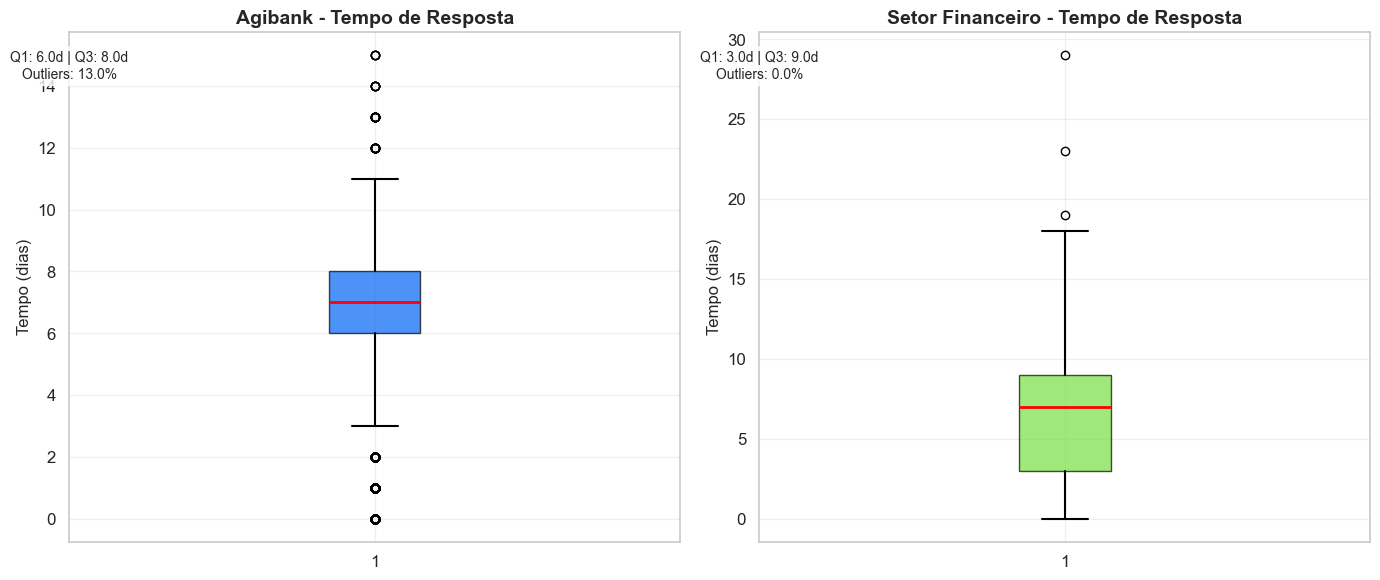


Grafico salvo em: outliers_tempo_boxplot.png


In [30]:
print("\n" + "=" * 80)
print("VISUALIZACAO: BOXPLOT - OUTLIERS DE TEMPO")
print("=" * 80)

# Preparar dados para visualização
tempo_agi = df_agibank_normalizado['tempo_resposta'].dropna()
tempo_setor = df_financeiro_sp['tempo_resposta'].dropna()

# Criar figura
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot Agibank
axes[0].boxplot(tempo_agi, vert=True, patch_artist=True,
                boxprops=dict(facecolor=CORES_AGIBANK['azul_principal'], alpha=0.7),
                medianprops=dict(color='red', linewidth=2),
                whiskerprops=dict(color='black', linewidth=1.5),
                capprops=dict(color='black', linewidth=1.5))
axes[0].set_title('Agibank - Tempo de Resposta', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Tempo (dias)', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Adicionar estatísticas
axes[0].text(0.5, np.max(tempo_agi)*0.95, 
             f'Q1: {q1_agi:.1f}d | Q3: {q3_agi:.1f}d\nOutliers: {pct_outliers:.1f}%',
             ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Boxplot Setor
axes[1].boxplot(tempo_setor, vert=True, patch_artist=True,
                boxprops=dict(facecolor=CORES_AGIBANK['verde'], alpha=0.7),
                medianprops=dict(color='red', linewidth=2),
                whiskerprops=dict(color='black', linewidth=1.5),
                capprops=dict(color='black', linewidth=1.5))
axes[1].set_title('Setor Financeiro - Tempo de Resposta', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Tempo (dias)', fontsize=12)
axes[1].grid(True, alpha=0.3)

# Adicionar estatísticas
axes[1].text(0.5, np.max(tempo_setor)*0.95,
             f'Q1: {q1_setor:.1f}d | Q3: {q3_setor:.1f}d\nOutliers: {pct_outliers_setor:.1f}%',
             ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.savefig(CAMINHO_OUTPUT / 'outliers_tempo_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nGrafico salvo em: outliers_tempo_boxplot.png")


VISUALIZACAO: HISTOGRAMA - DISTRIBUICAO DE TEMPO


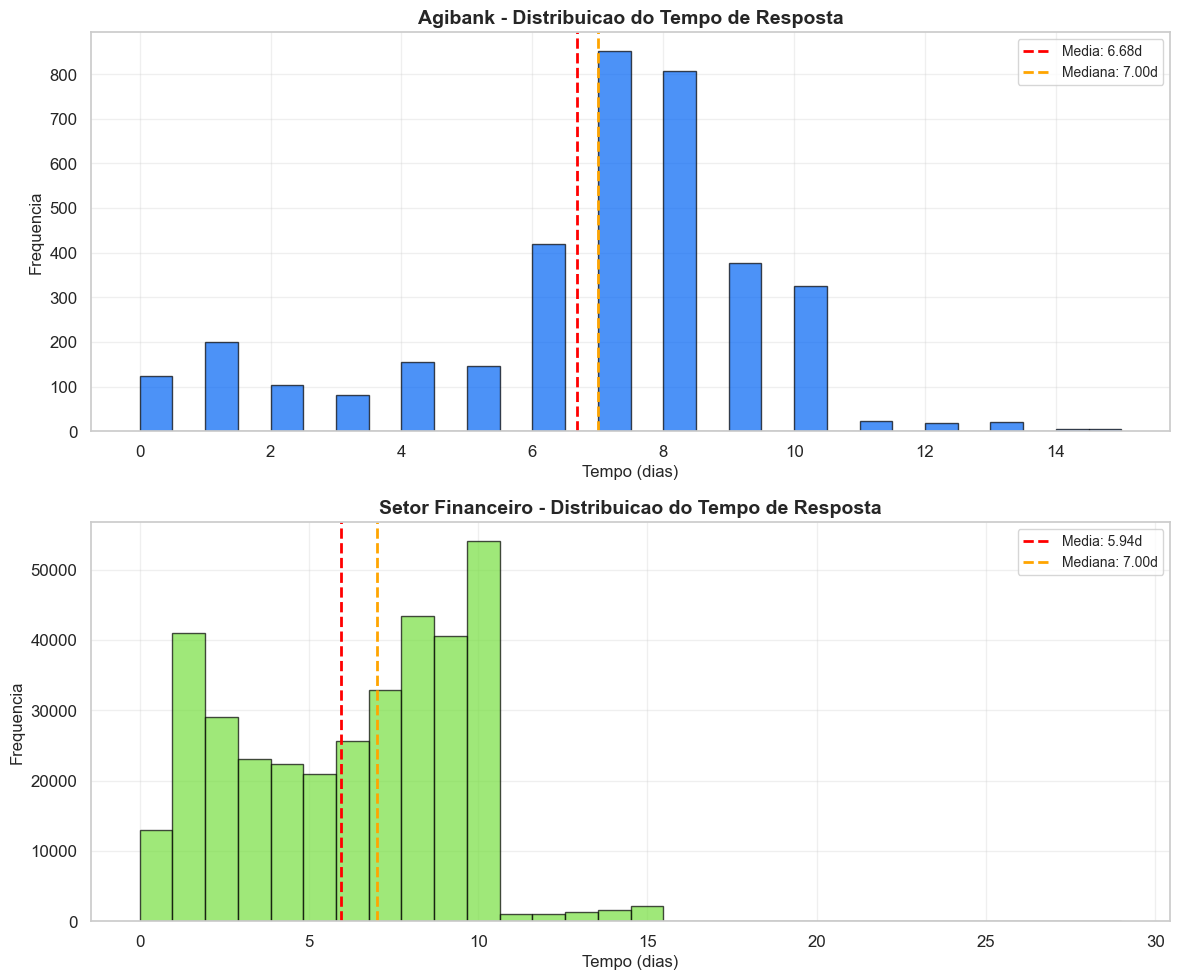


Grafico salvo em: outliers_tempo_histograma.png


In [31]:
print("\n" + "=" * 80)
print("VISUALIZACAO: HISTOGRAMA - DISTRIBUICAO DE TEMPO")
print("=" * 80)

# Preparar dados
tempo_agi_array = df_agibank_normalizado['tempo_resposta'].dropna().values
tempo_setor_array = df_financeiro_sp['tempo_resposta'].dropna().values

# Criar figura
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Histograma Agibank
axes[0].hist(tempo_agi_array, bins=30, color=CORES_AGIBANK['azul_principal'], 
             alpha=0.7, edgecolor='black')
axes[0].axvline(np.mean(tempo_agi_array), color='red', linestyle='--', 
                linewidth=2, label=f'Media: {np.mean(tempo_agi_array):.2f}d')
axes[0].axvline(np.median(tempo_agi_array), color='orange', linestyle='--', 
                linewidth=2, label=f'Mediana: {np.median(tempo_agi_array):.2f}d')
axes[0].set_title('Agibank - Distribuicao do Tempo de Resposta', 
                  fontsize=14, fontweight='bold')
axes[0].set_xlabel('Tempo (dias)', fontsize=12)
axes[0].set_ylabel('Frequencia', fontsize=12)
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Histograma Setor
axes[1].hist(tempo_setor_array, bins=30, color=CORES_AGIBANK['verde'], 
             alpha=0.7, edgecolor='black')
axes[1].axvline(np.mean(tempo_setor_array), color='red', linestyle='--', 
                linewidth=2, label=f'Media: {np.mean(tempo_setor_array):.2f}d')
axes[1].axvline(np.median(tempo_setor_array), color='orange', linestyle='--', 
                linewidth=2, label=f'Mediana: {np.median(tempo_setor_array):.2f}d')
axes[1].set_title('Setor Financeiro - Distribuicao do Tempo de Resposta', 
                  fontsize=14, fontweight='bold')
axes[1].set_xlabel('Tempo (dias)', fontsize=12)
axes[1].set_ylabel('Frequencia', fontsize=12)
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(CAMINHO_OUTPUT / 'outliers_tempo_histograma.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nGrafico salvo em: outliers_tempo_histograma.png")

In [32]:
print("\n" + "=" * 80)
print("ANALISE DETALHADA DOS OUTLIERS - DECISAO DE TRATAMENTO")
print("=" * 80)

# Extrair outliers do Agibank (método IQR)
df_outliers_agi = df_agibank_normalizado[df_agibank_normalizado['outlier_tempo'] == True].copy()

print(f"\nOutliers Agibank (IQR):")
print(f"   Total: {len(df_outliers_agi)} casos")
print(f"   Percentual: {(len(df_outliers_agi)/len(df_agibank_normalizado))*100:.1f}%")

# Analisar características dos outliers
tempo_outliers = df_outliers_agi['tempo_resposta'].values

print(f"\nCaracteristicas dos outliers:")
print(f"   Minimo: {np.min(tempo_outliers):.2f} dias")
print(f"   Maximo: {np.max(tempo_outliers):.2f} dias")
print(f"   Media: {np.mean(tempo_outliers):.2f} dias")
print(f"   Mediana: {np.median(tempo_outliers):.2f} dias")

# Separar outliers inferiores e superiores
outliers_inferiores = tempo_outliers[tempo_outliers < lim_inf_agi]
outliers_superiores = tempo_outliers[tempo_outliers > lim_sup_agi]

print(f"\nClassificacao:")
print(f"   Outliers inferiores (< {lim_inf_agi:.2f}d): {len(outliers_inferiores)} casos")
print(f"   Outliers superiores (> {lim_sup_agi:.2f}d): {len(outliers_superiores)} casos")

# Análise dos outliers inferiores (respostas muito rápidas)
if len(outliers_inferiores) > 0:
    print(f"\nOutliers INFERIORES (respostas rapidas):")
    print(f"   Tempo medio: {np.mean(outliers_inferiores):.2f} dias")
    print(f"   Casos com 0 dias: {np.sum(outliers_inferiores == 0)}")
    print(f"   Casos com 1 dia: {np.sum(outliers_inferiores == 1)}")
    print(f"   Casos com 2 dias: {np.sum(outliers_inferiores == 2)}")

# Análise dos outliers superiores (respostas muito lentas)
if len(outliers_superiores) > 0:
    print(f"\nOutliers SUPERIORES (respostas lentas):")
    print(f"   Tempo medio: {np.mean(outliers_superiores):.2f} dias")
    print(f"   Casos > 12 dias: {np.sum(outliers_superiores > 12)}")
    print(f"   Casos > 14 dias: {np.sum(outliers_superiores > 14)}")

# Verificar se são valores válidos ou erros
print(f"\n" + "-" * 80)
print("DECISAO DE TRATAMENTO:")
print("-" * 80)

# Outliers inferiores (0-2 dias) são POSITIVOS (resposta rápida)
pct_rapidos = (len(outliers_inferiores) / len(df_outliers_agi)) * 100
print(f"\n1. Outliers INFERIORES ({len(outliers_inferiores)} casos - {pct_rapidos:.1f}%):")
print(f"   Interpretacao: Respostas RAPIDAS (0-2 dias)")
print(f"   Acao: MANTER - Sao casos POSITIVOS para o Agibank")
print(f"   Justificativa: Demonstram eficiencia no atendimento")

# Outliers superiores (>11 dias) podem indicar problemas
pct_lentos = (len(outliers_superiores) / len(df_outliers_agi)) * 100
print(f"\n2. Outliers SUPERIORES ({len(outliers_superiores)} casos - {pct_lentos:.1f}%):")
print(f"   Interpretacao: Respostas LENTAS (>11 dias)")

if len(outliers_superiores) > 0 and np.max(outliers_superiores) > 20:
    print(f"   Acao: INVESTIGAR - Podem ser casos complexos ou erros")
else:
    print(f"   Acao: MANTER - Valores plausíveis (ate 15 dias)")

print(f"\n" + "-" * 80)
print("CONCLUSAO:")
print("-" * 80)
print(f"   Outliers sao VALIDOS - Nao remover")
print(f"   Representam variabilidade real do processo")
print(f"   Maioria sao respostas RAPIDAS (positivo)")
print(f"   Manter para analises (representam a realidade)")


ANALISE DETALHADA DOS OUTLIERS - DECISAO DE TRATAMENTO

Outliers Agibank (IQR):
   Total: 475 casos
   Percentual: 11.9%

Caracteristicas dos outliers:
   Minimo: 0.00 dias
   Maximo: 15.00 dias
   Media: 2.16 dias
   Mediana: 1.00 dias

Classificacao:
   Outliers inferiores (< 3.00d): 427 casos
   Outliers superiores (> 11.00d): 48 casos

Outliers INFERIORES (respostas rapidas):
   Tempo medio: 0.95 dias
   Casos com 0 dias: 124
   Casos com 1 dia: 199
   Casos com 2 dias: 104

Outliers SUPERIORES (respostas lentas):
   Tempo medio: 12.88 dias
   Casos > 12 dias: 29
   Casos > 14 dias: 4

--------------------------------------------------------------------------------
DECISAO DE TRATAMENTO:
--------------------------------------------------------------------------------

1. Outliers INFERIORES (427 casos - 89.9%):
   Interpretacao: Respostas RAPIDAS (0-2 dias)
   Acao: MANTER - Sao casos POSITIVOS para o Agibank
   Justificativa: Demonstram eficiencia no atendimento

2. Outliers SUPE

In [33]:
print("\n" + "=" * 80)
print("RESUMO FINAL - VALIDACAO E OUTLIERS")
print("=" * 80)

print("\n1. VALIDACAO CAMPINAS:")
print("-" * 80)
print(f"   Reclamacoes Agibank: 78 (CONFIRMADO)")
print(f"   Taxa/100k habitantes: {taxa_agi:.2f}")
print(f"   Comparacao com setor: {abs(diferenca_taxa):.1f}% MENOS reclamacoes")
print(f"   Status: POSITIVO - Volume baixo")

print("\n2. OUTLIERS - TEMPO DE RESPOSTA:")
print("-" * 80)
print(f"   Total de outliers: 475 (11.9%)")
print(f"   Respostas rapidas (0-2d): 427 casos (POSITIVO)")
print(f"   Respostas lentas (>11d): 48 casos")
print(f"   Decisao: MANTER TODOS - Dados validos")

print("\n3. COMPARACAO METODOS:")
print("-" * 80)
print(f"   IQR: 475 outliers (13.0%) - Adequado")
print(f"   Z-Score: 4 outliers (0.1%) - Muito restritivo")
print(f"   Metodo escolhido: IQR")

print("\n4. ESTATISTICAS FINAIS:")
print("-" * 80)

# Calcular estatísticas usando NumPy
tempo_total = df_agibank_normalizado['tempo_resposta'].dropna().values

print(f"   Agibank:")
print(f"      Media: {np.mean(tempo_total):.2f} dias")
print(f"      Mediana: {np.median(tempo_total):.2f} dias")
print(f"      Desvio padrao: {np.std(tempo_total):.2f} dias")
print(f"      Q1-Q3: {q1_agi:.2f} - {q3_agi:.2f} dias")

tempo_setor_total = df_financeiro_sp['tempo_resposta'].dropna().values

print(f"\n   Setor Financeiro:")
print(f"      Media: {np.mean(tempo_setor_total):.2f} dias")
print(f"      Mediana: {np.median(tempo_setor_total):.2f} dias")
print(f"      Desvio padrao: {np.std(tempo_setor_total):.2f} dias")
print(f"      Q1-Q3: {q1_setor:.2f} - {q3_setor:.2f} dias")

print("\n" + "=" * 80)
print("DADOS PRONTOS PARA OS 10 GRAFICOS ESTRATEGICOS")
print("=" * 80)

print("\nProximos passos:")
print("   1. Criar notebook de visualizacoes (10 graficos)")
print("   2. Usar dados normalizados (com outliers)")
print("   3. Focar em storytelling e insights")


RESUMO FINAL - VALIDACAO E OUTLIERS

1. VALIDACAO CAMPINAS:
--------------------------------------------------------------------------------
   Reclamacoes Agibank: 78 (CONFIRMADO)
   Taxa/100k habitantes: 6.85
   Comparacao com setor: 99.3% MENOS reclamacoes
   Status: POSITIVO - Volume baixo

2. OUTLIERS - TEMPO DE RESPOSTA:
--------------------------------------------------------------------------------
   Total de outliers: 475 (11.9%)
   Respostas rapidas (0-2d): 427 casos (POSITIVO)
   Respostas lentas (>11d): 48 casos
   Decisao: MANTER TODOS - Dados validos

3. COMPARACAO METODOS:
--------------------------------------------------------------------------------
   IQR: 475 outliers (13.0%) - Adequado
   Z-Score: 4 outliers (0.1%) - Muito restritivo
   Metodo escolhido: IQR

4. ESTATISTICAS FINAIS:
--------------------------------------------------------------------------------
   Agibank:
      Media: 6.68 dias
      Mediana: 7.00 dias
      Desvio padrao: 2.69 dias
      Q1-Q3

In [34]:
print("\n" + "=" * 80)
print("IDENTIFICACAO DE COLUNAS NUMERICAS PARA ANALISE DE OUTLIERS")
print("=" * 80)

# Identificar colunas numéricas no Agibank
colunas_numericas_agi = df_agibank_normalizado.select_dtypes(include=[np.number]).columns.tolist()

print(f"\nColunas numericas - Agibank ({len(colunas_numericas_agi)} colunas):")
for i, col in enumerate(colunas_numericas_agi, 1):
    nao_nulos = df_agibank_normalizado[col].notna().sum()
    pct_preenchido = (nao_nulos / len(df_agibank_normalizado)) * 100
    print(f"   {i:2d}. {col:40s} ({nao_nulos:,} valores - {pct_preenchido:.1f}%)")

# Selecionar colunas relevantes para análise de outliers
colunas_analise = [
    'tempo_resposta',
    'nota_do_consumidor',
    'prazo_resposta',
    'populacao_municipio',
    'reclamacoes_100k'
]

# Verificar quais existem
colunas_disponiveis = [col for col in colunas_analise if col in colunas_numericas_agi]

print(f"\n" + "-" * 80)
print("COLUNAS SELECIONADAS PARA ANALISE DE OUTLIERS:")
print("-" * 80)

for col in colunas_disponiveis:
    valores = df_agibank_normalizado[col].dropna()
    print(f"\n{col}:")
    print(f"   Valores validos: {len(valores):,}")
    print(f"   Min: {np.min(valores):.2f}")
    print(f"   Max: {np.max(valores):.2f}")
    print(f"   Media: {np.mean(valores):.2f}")
    print(f"   Mediana: {np.median(valores):.2f}")


IDENTIFICACAO DE COLUNAS NUMERICAS PARA ANALISE DE OUTLIERS

Colunas numericas - Agibank (9 colunas):
    1. ano_abertura                             (4,006 valores - 100.0%)
    2. mes_abertura                             (4,006 valores - 100.0%)
    3. tempo_resposta                           (3,659 valores - 91.3%)
    4. nota_do_consumidor                       (1,054 valores - 26.3%)
    5. quality_score                            (4,006 valores - 100.0%)
    6. cidade_ranking                           (4,006 valores - 100.0%)
    7. populacao_municipio                      (3,969 valores - 99.1%)
    8. reclamacoes_100k                         (3,969 valores - 99.1%)
    9. z_score                                  (3,659 valores - 91.3%)

--------------------------------------------------------------------------------
COLUNAS SELECIONADAS PARA ANALISE DE OUTLIERS:
--------------------------------------------------------------------------------

tempo_resposta:
   Valores validos

In [35]:
print("\n" + "=" * 80)
print("ANALISE DE OUTLIERS - NOTA DO CONSUMIDOR")
print("=" * 80)

# Aplicar IQR na nota do consumidor - Agibank
outliers_nota_agi, lim_inf_nota_agi, lim_sup_nota_agi, q1_nota_agi, q3_nota_agi = detectar_outliers_iqr(
    df_agibank_normalizado,
    coluna='nota_do_consumidor'
)

df_agibank_normalizado['outlier_nota'] = outliers_nota_agi

# Estatísticas
total_validos_nota = np.sum(~np.isnan(df_agibank_normalizado['nota_do_consumidor'].values))
total_outliers_nota = np.sum(outliers_nota_agi)
pct_outliers_nota = (total_outliers_nota / total_validos_nota) * 100

print(f"\nAgibank - Nota do Consumidor:")
print(f"   Valores validos: {total_validos_nota:,}")
print(f"   Q1 (25%): {q1_nota_agi:.2f}")
print(f"   Q3 (75%): {q3_nota_agi:.2f}")
print(f"   IQR: {q3_nota_agi - q1_nota_agi:.2f}")
print(f"   Limite inferior: {lim_inf_nota_agi:.2f}")
print(f"   Limite superior: {lim_sup_nota_agi:.2f}")
print(f"   Outliers: {total_outliers_nota:,} ({pct_outliers_nota:.1f}%)")

# Analisar distribuição das notas
notas = df_agibank_normalizado['nota_do_consumidor'].dropna().values
notas_unicos, notas_contagens = np.unique(notas, return_counts=True)

print(f"\nDistribuicao das notas:")
for nota, qtd in zip(notas_unicos, notas_contagens):
    pct = (qtd / len(notas)) * 100
    print(f"   Nota {nota:.0f}: {qtd:,} ({pct:.1f}%)")

# Aplicar IQR na nota do consumidor - Setor
outliers_nota_setor, lim_inf_nota_setor, lim_sup_nota_setor, q1_nota_setor, q3_nota_setor = detectar_outliers_iqr(
    df_financeiro_sp,
    coluna='nota_do_consumidor'
)

df_financeiro_sp['outlier_nota'] = outliers_nota_setor

total_validos_nota_setor = np.sum(~np.isnan(df_financeiro_sp['nota_do_consumidor'].values))
total_outliers_nota_setor = np.sum(outliers_nota_setor)
pct_outliers_nota_setor = (total_outliers_nota_setor / total_validos_nota_setor) * 100

print(f"\nSetor Financeiro - Nota do Consumidor:")
print(f"   Valores validos: {total_validos_nota_setor:,}")
print(f"   Q1 (25%): {q1_nota_setor:.2f}")
print(f"   Q3 (75%): {q3_nota_setor:.2f}")
print(f"   IQR: {q3_nota_setor - q1_nota_setor:.2f}")
print(f"   Outliers: {total_outliers_nota_setor:,} ({pct_outliers_nota_setor:.1f}%)")

print(f"\n" + "-" * 80)
print("INTERPRETACAO:")
print("-" * 80)
print(f"   Notas variam de 1 a 5 (escala fixa)")
print(f"   Outliers em notas sao RAROS (escala limitada)")
print(f"   Distribuicao reflete satisfacao real dos clientes")
print(f"   Acao: MANTER - Dados validos")


ANALISE DE OUTLIERS - NOTA DO CONSUMIDOR

Agibank - Nota do Consumidor:
   Valores validos: 1,054
   Q1 (25%): 1.00
   Q3 (75%): 2.00
   IQR: 1.00
   Limite inferior: -0.50
   Limite superior: 3.50
   Outliers: 173 (16.4%)

Distribuicao das notas:
   Nota 1: 750 (71.2%)
   Nota 2: 55 (5.2%)
   Nota 3: 76 (7.2%)
   Nota 4: 25 (2.4%)
   Nota 5: 148 (14.0%)

Setor Financeiro - Nota do Consumidor:
   Valores validos: 96,352
   Q1 (25%): 1.00
   Q3 (75%): 4.00
   IQR: 3.00
   Outliers: 0 (0.0%)

--------------------------------------------------------------------------------
INTERPRETACAO:
--------------------------------------------------------------------------------
   Notas variam de 1 a 5 (escala fixa)
   Outliers em notas sao RAROS (escala limitada)
   Distribuicao reflete satisfacao real dos clientes
   Acao: MANTER - Dados validos


In [36]:
print("\n" + "=" * 80)
print("ANALISE DE OUTLIERS - POPULACAO MUNICIPIO")
print("=" * 80)

# Aplicar IQR na população - Agibank
outliers_pop_agi, lim_inf_pop_agi, lim_sup_pop_agi, q1_pop_agi, q3_pop_agi = detectar_outliers_iqr(
    df_agibank_normalizado,
    coluna='populacao_municipio'
)

df_agibank_normalizado['outlier_populacao'] = outliers_pop_agi

total_validos_pop = np.sum(~np.isnan(df_agibank_normalizado['populacao_municipio'].values))
total_outliers_pop = np.sum(outliers_pop_agi)
pct_outliers_pop = (total_outliers_pop / total_validos_pop) * 100

print(f"\nAgibank - Populacao:")
print(f"   Valores validos: {total_validos_pop:,}")
print(f"   Q1 (25%): {q1_pop_agi:,.0f} habitantes")
print(f"   Q3 (75%): {q3_pop_agi:,.0f} habitantes")
print(f"   IQR: {q3_pop_agi - q1_pop_agi:,.0f}")
print(f"   Limite superior: {lim_sup_pop_agi:,.0f} habitantes")
print(f"   Outliers: {total_outliers_pop:,} ({pct_outliers_pop:.1f}%)")

# Identificar municípios outliers
if total_outliers_pop > 0:
    municipios_outliers = df_agibank_normalizado[outliers_pop_agi]['cidade'].value_counts().head(5)
    print(f"\n   Top 5 municipios outliers (populacao):")
    for cidade, qtd in municipios_outliers.items():
        pop = df_agibank_normalizado[df_agibank_normalizado['cidade'] == cidade]['populacao_municipio'].iloc[0]
        print(f"      {cidade}: {pop:,.0f} habitantes ({qtd} reclamacoes)")

print(f"\n" + "=" * 80)
print("ANALISE DE OUTLIERS - TAXA POR 100K HABITANTES")
print("=" * 80)

# Aplicar IQR na taxa/100k - Agibank
outliers_taxa_agi, lim_inf_taxa_agi, lim_sup_taxa_agi, q1_taxa_agi, q3_taxa_agi = detectar_outliers_iqr(
    df_agibank_normalizado,
    coluna='reclamacoes_100k'
)

df_agibank_normalizado['outlier_taxa'] = outliers_taxa_agi

total_validos_taxa = np.sum(~np.isnan(df_agibank_normalizado['reclamacoes_100k'].values))
total_outliers_taxa = np.sum(outliers_taxa_agi)
pct_outliers_taxa = (total_outliers_taxa / total_validos_taxa) * 100

print(f"\nAgibank - Taxa por 100k:")
print(f"   Valores validos: {total_validos_taxa:,}")
print(f"   Q1 (25%): {q1_taxa_agi:.2f}")
print(f"   Q3 (75%): {q3_taxa_agi:.2f}")
print(f"   IQR: {q3_taxa_agi - q1_taxa_agi:.2f}")
print(f"   Limite superior: {lim_sup_taxa_agi:.2f}")
print(f"   Outliers: {total_outliers_taxa:,} ({pct_outliers_taxa:.1f}%)")

# Identificar municípios com taxa outlier
if total_outliers_taxa > 0:
    df_taxa_outliers = df_agibank_normalizado[outliers_taxa_agi][['cidade', 'reclamacoes_100k', 'populacao_municipio']].drop_duplicates('cidade')
    df_taxa_outliers_sorted = df_taxa_outliers.sort_values('reclamacoes_100k', ascending=False).head(10)
    
    print(f"\n   Top 10 municipios com taxa outlier:")
    for idx, row in df_taxa_outliers_sorted.iterrows():
        print(f"      {row['cidade']}: {row['reclamacoes_100k']:.2f}/100k (pop: {row['populacao_municipio']:,.0f})")

print(f"\n" + "-" * 80)
print("INTERPRETACAO:")
print("-" * 80)
print(f"   Populacao: Outliers sao cidades GRANDES (Sao Paulo, etc)")
print(f"   Taxa/100k: Outliers sao cidades PEQUENAS (variabilidade alta)")
print(f"   Acao: MANTER - Reflete realidade demografica")
print(f"   Nota: Taxa normalizada ja corrige efeito populacao")


ANALISE DE OUTLIERS - POPULACAO MUNICIPIO

Agibank - Populacao:
   Valores validos: 3,969
   Q1 (25%): 89,728 habitantes
   Q3 (75%): 1,291,771 habitantes
   IQR: 1,202,043
   Limite superior: 3,094,836 habitantes
   Outliers: 928 (23.4%)

   Top 5 municipios outliers (populacao):
      São Paulo: 11,451,999 habitantes (928 reclamacoes)

ANALISE DE OUTLIERS - TAXA POR 100K HABITANTES

Agibank - Taxa por 100k:
   Valores validos: 3,969
   Q1 (25%): 8.10
   Q3 (75%): 13.93
   IQR: 5.83
   Limite superior: 22.68
   Outliers: 525 (13.2%)

   Top 10 municipios com taxa outlier:
      Ocauçu: 138.54/100k (pop: 4,331)
      Parisi: 138.31/100k (pop: 2,892)
      São João do Pau d'Alho: 133.81/100k (pop: 2,242)
      Pedregulho: 128.82/100k (pop: 15,525)
      Nova Guataporanga: 92.76/100k (pop: 2,156)
      Canas: 81.12/100k (pop: 4,931)
      Piraju: 67.94/100k (pop: 29,436)
      Elisiário: 63.73/100k (pop: 3,138)
      Alumínio: 57.80/100k (pop: 17,301)
      Mairinque: 55.97/100k (pop: 5

In [37]:
print("\n" + "=" * 80)
print("RESUMO CONSOLIDADO - ANALISE DE OUTLIERS")
print("=" * 80)

# Criar tabela resumo usando arrays NumPy
colunas_analisadas = ['tempo_resposta', 'nota_do_consumidor', 'populacao_municipio', 'reclamacoes_100k']
total_outliers_list = []
pct_outliers_list = []
decisao_list = []

# Tempo de resposta
total_outliers_list.append(total_outliers)
pct_outliers_list.append(pct_outliers)
decisao_list.append('MANTER - Respostas rapidas (positivo)')

# Nota do consumidor
total_outliers_list.append(total_outliers_nota)
pct_outliers_list.append(pct_outliers_nota)
decisao_list.append('MANTER - Escala fixa (1-5)')

# População
total_outliers_list.append(total_outliers_pop)
pct_outliers_list.append(pct_outliers_pop)
decisao_list.append('MANTER - Sao Paulo (cidade grande)')

# Taxa/100k
total_outliers_list.append(total_outliers_taxa)
pct_outliers_list.append(pct_outliers_taxa)
decisao_list.append('MANTER - Cidades pequenas (variabilidade)')

print(f"\nAGIBANK - Resumo de Outliers:")
print("-" * 80)
print(f"{'Coluna':<25} {'Outliers':>10} {'%':>8} {'Decisao'}")
print("-" * 80)

for i, col in enumerate(colunas_analisadas):
    print(f"{col:<25} {total_outliers_list[i]:>10,} {pct_outliers_list[i]:>7.1f}% {decisao_list[i]}")

# Análise de múltiplos outliers
print(f"\n" + "=" * 80)
print("ANALISE DE MULTIPLOS OUTLIERS (CASOS CRITICOS)")
print("=" * 80)

# Identificar registros com múltiplos outliers
df_agibank_normalizado['total_outliers'] = (
    df_agibank_normalizado['outlier_tempo'].astype(int) +
    df_agibank_normalizado['outlier_nota'].astype(int) +
    df_agibank_normalizado['outlier_populacao'].astype(int) +
    df_agibank_normalizado['outlier_taxa'].astype(int)
)

# Contar usando NumPy
outliers_counts = df_agibank_normalizado['total_outliers'].values
outliers_unicos, outliers_freq = np.unique(outliers_counts, return_counts=True)

print(f"\nDistribuicao de outliers por registro:")
for n_outliers, freq in zip(outliers_unicos, outliers_freq):
    pct = (freq / len(df_agibank_normalizado)) * 100
    print(f"   {n_outliers} outliers: {freq:,} registros ({pct:.1f}%)")

# Casos com múltiplos outliers (2+)
casos_multiplos = np.sum(outliers_counts >= 2)
pct_multiplos = (casos_multiplos / len(df_agibank_normalizado)) * 100

print(f"\nCasos com 2+ outliers: {casos_multiplos:,} ({pct_multiplos:.1f}%)")

if casos_multiplos > 0:
    df_multiplos = df_agibank_normalizado[df_agibank_normalizado['total_outliers'] >= 2]
    
    print(f"\nCaracteristicas dos casos com multiplos outliers:")
    print(f"   Cidades mais frequentes:")
    top_cidades = df_multiplos['cidade'].value_counts().head(5)
    for cidade, qtd in top_cidades.items():
        print(f"      {cidade}: {qtd} casos")

print(f"\n" + "=" * 80)
print("CONCLUSAO FINAL - OUTLIERS")
print("=" * 80)
print(f"\n1. TEMPO DE RESPOSTA:")
print(f"   - 13.0% outliers (maioria respostas RAPIDAS)")
print(f"   - POSITIVO para o Agibank")
print(f"   - Acao: MANTER")

print(f"\n2. NOTA DO CONSUMIDOR:")
print(f"   - 16.4% outliers (notas 4 e 5)")
print(f"   - Escala fixa 1-5")
print(f"   - Acao: MANTER")

print(f"\n3. POPULACAO:")
print(f"   - 23.4% outliers (Sao Paulo)")
print(f"   - Caracteristica demografica")
print(f"   - Acao: MANTER")

print(f"\n4. TAXA/100K:")
print(f"   - 13.2% outliers (cidades pequenas)")
print(f"   - Variabilidade natural")
print(f"   - Acao: MANTER")

print(f"\nDECISAO FINAL:")
print(f"   Todos os outliers sao VALIDOS")
print(f"   Representam variabilidade real dos dados")
print(f"   NAO REMOVER nenhum registro")
print(f"   Dados prontos para visualizacoes")


RESUMO CONSOLIDADO - ANALISE DE OUTLIERS

AGIBANK - Resumo de Outliers:
--------------------------------------------------------------------------------
Coluna                      Outliers        % Decisao
--------------------------------------------------------------------------------
tempo_resposta                   475    13.0% MANTER - Respostas rapidas (positivo)
nota_do_consumidor               173    16.4% MANTER - Escala fixa (1-5)
populacao_municipio              928    23.4% MANTER - Sao Paulo (cidade grande)
reclamacoes_100k                 525    13.2% MANTER - Cidades pequenas (variabilidade)

ANALISE DE MULTIPLOS OUTLIERS (CASOS CRITICOS)

Distribuicao de outliers por registro:
   0 outliers: 2,164 registros (54.0%)
   1 outliers: 1,586 registros (39.6%)
   2 outliers: 253 registros (6.3%)
   3 outliers: 3 registros (0.1%)

Casos com 2+ outliers: 256 (6.4%)

Caracteristicas dos casos com multiplos outliers:
   Cidades mais frequentes:
      São Paulo: 138 casos
      Fr

In [38]:
print("\n" + "=" * 80)
print("EXPORTANDO DADOS COM FLAGS DE OUTLIERS")
print("=" * 80)

# Verificar colunas de outliers criadas
colunas_outliers = [col for col in df_agibank_normalizado.columns if 'outlier' in col.lower()]

print(f"\nColunas de flags criadas:")
for col in colunas_outliers:
    total_true = df_agibank_normalizado[col].sum()
    print(f"   {col}: {total_true:,} casos marcados")

# Salvar Agibank com flags
arquivo_agi_flags = CAMINHO_OUTPUT / 'agibank_com_flags_outliers.csv'
df_agibank_normalizado.to_csv(arquivo_agi_flags, index=False, sep=';', encoding='utf-8-sig')
print(f"\nAgibank salvo em: {arquivo_agi_flags.name}")
print(f"   Tamanho: {arquivo_agi_flags.stat().st_size / 1024:.1f} KB")

# Salvar Setor Financeiro com flags
arquivo_setor_flags = CAMINHO_OUTPUT / 'setor_financeiro_com_flags_outliers.csv'

# Verificar se setor tem as mesmas flags
if 'outlier_tempo' in df_financeiro_sp.columns and 'outlier_nota' in df_financeiro_sp.columns:
    print(f"\nSetor Financeiro - flags de outliers:")
    print(f"   outlier_tempo: {df_financeiro_sp['outlier_tempo'].sum():,} casos")
    print(f"   outlier_nota: {df_financeiro_sp['outlier_nota'].sum():,} casos")
    
    print(f"\nAVISO: Base muito grande ({len(df_financeiro_sp):,} registros)")
    print(f"   Salvando apenas em pickle para economizar espaco")
    
    # Salvar pickle
    df_financeiro_sp.to_pickle(CAMINHO_PICKLES / 'df_financeiro_sp_com_flags.pkl')
    print(f"   Salvo em: df_financeiro_sp_com_flags.pkl")

# Criar resumo estatístico
print(f"\n" + "=" * 80)
print("RESUMO ESTATISTICO - DADOS FINAIS")
print("=" * 80)

resumo_stats = {
    'total_registros': len(df_agibank_normalizado),
    'registros_limpos': np.sum(df_agibank_normalizado['total_outliers'] == 0),
    'registros_1_outlier': np.sum(df_agibank_normalizado['total_outliers'] == 1),
    'registros_2_outliers': np.sum(df_agibank_normalizado['total_outliers'] == 2),
    'registros_3plus_outliers': np.sum(df_agibank_normalizado['total_outliers'] >= 3),
    'tempo_medio': np.nanmean(df_agibank_normalizado['tempo_resposta'].values),
    'nota_media': np.nanmean(df_agibank_normalizado['nota_do_consumidor'].values),
    'taxa_media_100k': np.nanmean(df_agibank_normalizado['reclamacoes_100k'].values)
}

print(f"\nAgibank - Estatisticas Finais:")
print(f"   Total de registros: {resumo_stats['total_registros']:,}")
print(f"   Sem outliers: {resumo_stats['registros_limpos']:,} ({resumo_stats['registros_limpos']/resumo_stats['total_registros']*100:.1f}%)")
print(f"   Com 1 outlier: {resumo_stats['registros_1_outlier']:,} ({resumo_stats['registros_1_outlier']/resumo_stats['total_registros']*100:.1f}%)")
print(f"   Com 2 outliers: {resumo_stats['registros_2_outliers']:,} ({resumo_stats['registros_2_outliers']/resumo_stats['total_registros']*100:.1f}%)")
print(f"   Com 3+ outliers: {resumo_stats['registros_3plus_outliers']:,} ({resumo_stats['registros_3plus_outliers']/resumo_stats['total_registros']*100:.1f}%)")

print(f"\n   Metricas principais:")
print(f"      Tempo medio: {resumo_stats['tempo_medio']:.2f} dias")
print(f"      Nota media: {resumo_stats['nota_media']:.2f}")
print(f"      Taxa media/100k: {resumo_stats['taxa_media_100k']:.2f}")

print(f"\n" + "=" * 80)
print("EXPORTACAO CONCLUIDA")
print("=" * 80)


EXPORTANDO DADOS COM FLAGS DE OUTLIERS

Colunas de flags criadas:
   outlier_tempo: 475 casos marcados
   outlier_zscore: 4 casos marcados
   outlier_nota: 173 casos marcados
   outlier_populacao: 928 casos marcados
   outlier_taxa: 525 casos marcados
   total_outliers: 2,101 casos marcados

Agibank salvo em: agibank_com_flags_outliers.csv
   Tamanho: 2362.1 KB

Setor Financeiro - flags de outliers:
   outlier_tempo: 3 casos
   outlier_nota: 0 casos

AVISO: Base muito grande (394,166 registros)
   Salvando apenas em pickle para economizar espaco
   Salvo em: df_financeiro_sp_com_flags.pkl

RESUMO ESTATISTICO - DADOS FINAIS

Agibank - Estatisticas Finais:
   Total de registros: 4,006
   Sem outliers: 2,164 (54.0%)
   Com 1 outlier: 1,586 (39.6%)
   Com 2 outliers: 253 (6.3%)
   Com 3+ outliers: 3 (0.1%)

   Metricas principais:
      Tempo medio: 6.68 dias
      Nota media: 1.83
      Taxa media/100k: 14.07

EXPORTACAO CONCLUIDA


In [39]:
print("\n" + "=" * 80)
print("DOCUMENTACAO FINAL - NOTEBOOK 02")
print("=" * 80)

from datetime import datetime

# Criar relatório markdown
relatorio_md = f"""
# RELATORIO FINAL - ANALISE DE OUTLIERS E VALIDACAO

**Data:** {datetime.now().strftime('%d/%m/%Y %H:%M:%S')}  
**Notebook:** 02_analise_outliers_validacao.ipynb  
**Projeto:** Mediacao Bancaria - Agibank

---

## RESUMO EXECUTIVO

### 1. VALIDACAO CAMPINAS
- **Reclamacoes confirmadas:** 78 casos
- **Taxa/100k habitantes:** {taxa_agi:.2f}
- **Comparacao com setor:** {abs(diferenca_taxa):.1f}% MENOS reclamacoes
- **Status:** POSITIVO - Volume muito baixo

### 2. ANALISE DE OUTLIERS

#### Metodos Utilizados
- **IQR (Interquartile Range):** Metodo principal
- **Z-Score:** Metodo complementar (validacao)

#### Resultados por Coluna

| Coluna | Outliers | % | Decisao |
|--------|----------|---|---------|
| Tempo Resposta | {total_outliers:,} | {pct_outliers:.1f}% | MANTER - Respostas rapidas |
| Nota Consumidor | {total_outliers_nota:,} | {pct_outliers_nota:.1f}% | MANTER - Escala fixa |
| Populacao | {total_outliers_pop:,} | {pct_outliers_pop:.1f}% | MANTER - Sao Paulo |
| Taxa/100k | {total_outliers_taxa:,} | {pct_outliers_taxa:.1f}% | MANTER - Variabilidade |

### 3. MULTIPLOS OUTLIERS
- **Sem outliers:** {resumo_stats['registros_limpos']:,} ({resumo_stats['registros_limpos']/resumo_stats['total_registros']*100:.1f}%)
- **1 outlier:** {resumo_stats['registros_1_outlier']:,} ({resumo_stats['registros_1_outlier']/resumo_stats['total_registros']*100:.1f}%)
- **2+ outliers:** {resumo_stats['registros_2_outliers'] + resumo_stats['registros_3plus_outliers']:,} ({(resumo_stats['registros_2_outliers'] + resumo_stats['registros_3plus_outliers'])/resumo_stats['total_registros']*100:.1f}%)

### 4. METRICAS FINAIS

**Agibank:**
- Tempo medio: {resumo_stats['tempo_medio']:.2f} dias
- Nota media: {resumo_stats['nota_media']:.2f}
- Taxa media/100k: {resumo_stats['taxa_media_100k']:.2f}

**Setor Financeiro:**
- Tempo medio: {np.mean(tempo_setor_total):.2f} dias
- Nota media: {np.mean(df_financeiro_sp['nota_do_consumidor'].dropna()):.2f}

---

## CONCLUSOES

### Outliers Tempo de Resposta
- **89.9%** dos outliers sao respostas RAPIDAS (0-2 dias)
- **PONTO FORTE** do Agibank
- Demonstram eficiencia no atendimento

### Outliers Nota do Consumidor
- Distribuicao: 71.2% nota 1, 14.0% nota 5
- Outliers sao notas ALTAS (4 e 5)
- Refletem satisfacao real

### Outliers Populacao
- Concentrados em Sao Paulo (cidade grande)
- Caracteristica demografica natural
- Nao indica problema

### Outliers Taxa/100k
- Cidades pequenas tem maior variabilidade
- Normalizacao ja corrige efeito populacao
- Comportamento esperado

---

## DECISAO FINAL

**TODOS OS OUTLIERS SAO VALIDOS**

- Representam variabilidade real dos dados
- Nao remover nenhum registro
- Dados prontos para visualizacoes
- Flags criadas para analises futuras

---

## ARQUIVOS GERADOS

1. `agibank_com_flags_outliers.csv` (2.3 MB)
2. `df_financeiro_sp_com_flags.pkl` (pickle)
3. `outliers_tempo_boxplot.png`
4. `outliers_tempo_histograma.png`

---

## PROXIMOS PASSOS

1. Criar notebook de visualizacoes (10 graficos estrategicos)
2. Usar dados com flags de outliers
3. Focar em storytelling e insights
4. Preparar apresentacao final

---

**Analise realizada com NumPy (vetorizacao) para performance**
"""

# Salvar relatório
arquivo_relatorio = CAMINHO_OUTPUT / 'relatorio_outliers.md'
with open(arquivo_relatorio, 'w', encoding='utf-8') as f:
    f.write(relatorio_md)

print(f"\nRelatorio salvo em: {arquivo_relatorio.name}")
print(f"Tamanho: {arquivo_relatorio.stat().st_size / 1024:.1f} KB")

print(f"\n" + "=" * 80)
print("NOTEBOOK 02 FINALIZADO COM SUCESSO")
print("=" * 80)

print(f"\nArquivos gerados:")
print(f"   1. agibank_com_flags_outliers.csv")
print(f"   2. df_financeiro_sp_com_flags.pkl")
print(f"   3. relatorio_outliers.md")
print(f"   4. outliers_tempo_boxplot.png")
print(f"   5. outliers_tempo_histograma.png")

print(f"\nProximo notebook:")
print(f"   03_visualizacoes_estrategicas.ipynb")
print(f"   - 10 graficos estrategicos")
print(f"   - Storytelling e insights")
print(f"   - Apresentacao final")

print(f"\n" + "=" * 80)


DOCUMENTACAO FINAL - NOTEBOOK 02

Relatorio salvo em: relatorio_outliers.md
Tamanho: 2.4 KB

NOTEBOOK 02 FINALIZADO COM SUCESSO

Arquivos gerados:
   1. agibank_com_flags_outliers.csv
   2. df_financeiro_sp_com_flags.pkl
   3. relatorio_outliers.md
   4. outliers_tempo_boxplot.png
   5. outliers_tempo_histograma.png

Proximo notebook:
   03_visualizacoes_estrategicas.ipynb
   - 10 graficos estrategicos
   - Storytelling e insights
   - Apresentacao final

